In [1]:
import numpy as np
from numpy.linalg import norm
import scipy.io
import matplotlib.pyplot as plt


In [2]:
mat = scipy.io.loadmat('D:/Users/Ziqiu/OneDrive/Documents/University Docs/Stat441/Stat441 A1/0_1_2.mat')

df = mat['X']
dft = df.transpose()
dft -= dft.mean(axis=0)


In [3]:
U, S, Vh = np.linalg.svd(dft)
pca = np.matmul(dft,Vh.transpose())
Y = pca[:,0:2]
X=np.reshape(mat['X'], (8,8,300))

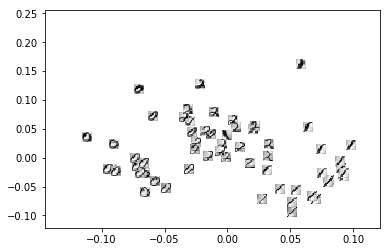

In [4]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
def plotimages(images, Y, scale=1.2, proportion=0.2):
    '''
    Input:
        images: images, must be in a 3-dimensional matrix (x by y by n)
            e.g. if X is 64 by 400 and size of each image is 8 by 8, images=np.reshape(X,(8,8,400));
        Y: coordinates of where to plot the image (Y(1,:) by Y(2,:)
        scale: scale of each image wrt to figure size (scale <= 1, e.g. 0.8)
        proportion: proportion of the data to be ploted (proportion <= 1)
            e.g. if there are 400 data points proportion = 1, plots
            all 400 data points and proportion = 0.5 plot only 200 data points 
            (i.e. 1th, 3th, 5th, ...)
    '''
    Y /= norm(Y, axis = 1, ord=2).reshape((Y.shape[0],1))
    
    inc = np.floor(1/proportion)
    
    image_width = images.shape[0]
    image_height = images.shape[1] 
    n_images = images.shape[2]
    
    plt.gray()
    fig = plt.gcf()
    fig.clf()
    ax = plt.subplot(111)
    ax.set_xlim((Y[0,:].min()*1.2,Y[0,:].max()*1.2))
    ax.set_ylim((Y[1,:].min()*1.2,Y[1,:].max()*1.2))
    
    for counter in np.arange(0,n_images,inc):
        counter = int(counter)
        xy = (Y[0,counter],Y[1,counter])
        current_image = 1-np.reshape(images[:,:,counter], (image_width,image_height))
        imagebox = OffsetImage(current_image, zoom=scale)
        ab = AnnotationBbox(imagebox, xy, xybox=(1., -1.), xycoords='data', boxcoords="offset points", frameon=False)                                  
        ax.add_artist(ab)
        plt.draw()
    plt.show()
    
plotimages(X, Y.transpose())